# Michaelis-Menten kinetics with non-linear and linear curve-fitting
### Jeffrey L. Mills
### May 2, 2019
### This is based on the numpy/scipy documentation on the curve_fit() function found here
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

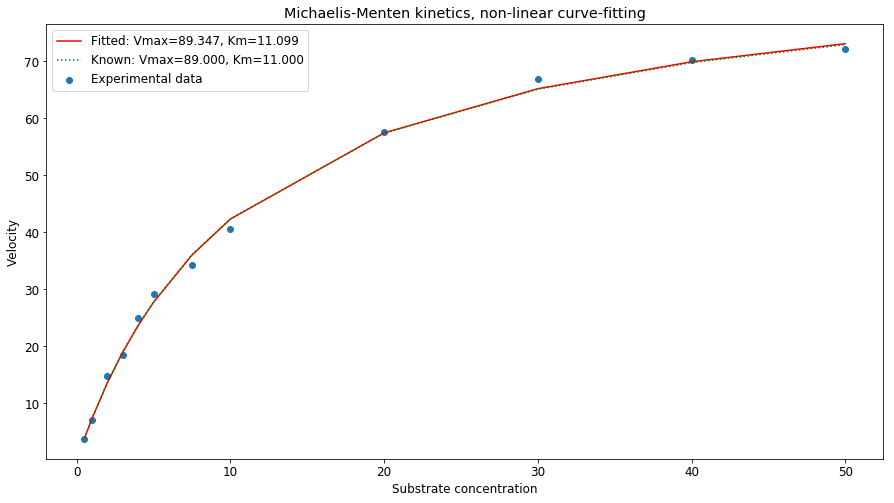

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats


# a convenient way to set the default font size for all plots
font = {'size'   : 12}
plt.rc('font', **font)


# simple reminder of definitions used below
# velocity = (Vmax * Substrate) / (Km + Substrate)
# a = Vmax
# b = Km
# x = Substrate
# y = velocity


# define the constants
Km = 11
Vmax = 89
percent_error = 0.05  # this will give you errors as y +/- 5% and the errors are normally distributed


# this function takes an array of substrate concentrations and calculates
# the velocity using the standard Michaelis-Menten equation
# NOTE: the independent variable must come first!
def MM(x, a, b):
    return (a * x) / (b + x)


# take the substrate concentrations and calculate the corresponding
# velocities using MM()
# use np.arange() or np.linspace() to create an array of evenly spaced simulated x-data
# I created this array of 12 elements to simulate a "real" experimental setup
xdata = np.array([0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 7.5, 10.0, 20.0, 30.0, 40.0, 50.0])
y = MM(xdata, Vmax, Km)



# define the random seed so we can repeat this over and over again
# while getting the same series of random numbers
np.random.seed(1729)


# calculate some noise
# you're going to get y +/- percent_error% (ave +/- percent)
# alternatively, you could give an absolute error
ydata = np.random.normal(y, percent_error * y)


# create the plot
plt.figure(figsize=(15,8))

# here is the scatter plot to show the XY-data
plt.scatter(xdata, ydata, label='Experimental data')

# fit!!!
popt, pcov = curve_fit(MM, xdata, ydata)

# here is the line plot to show the fit as a red line
plt.plot(xdata, MM(xdata, popt[0], popt[1]), 'r-', label='Fitted: Vmax=%5.3f, Km=%5.3f' % tuple(popt))
# here is the line plot to show known parameters as a green dotted line
plt.plot(xdata, MM(xdata, Vmax, Km), 'g:', label='Known: Vmax=%5.3f, Km=%5.3f' % tuple([Vmax, Km]))

# finish off the plot with axis labels and a legend
plt.xlabel('Substrate concentration')
plt.ylabel('Velocity')
plt.title('Michaelis-Menten kinetics, non-linear curve-fitting')
plt.legend()
plt.show()

In [14]:
# Here is a summary of the fitting quality and statistics
np.set_printoptions(formatter={'float': '{: 5.3f}'.format})

# calculate statistics
# perr is calculated according to the documentation for the curve_fit() function
perr = np.sqrt(np.diag(pcov))
chi2 = np.sum((ydata - MM(xdata, popt[0], popt[1]))**2 / MM(xdata, popt[0], popt[1]))

print("The optimized/fitted values are:\n  Vmax={:5.3f} Km={:5.3f}\n".format(popt[0], popt[1]))
print("The covariance matrix is:\n  {}\n".format(pcov))
print("The calculated error is:\n  {}\n".format(perr))
print("The chi^2 value is:\n  {:5.3f}\n".format(chi2))

The optimized/fitted values are:
  Vmax=89.347 Km=11.099

The covariance matrix is:
  [[ 2.440  0.717]
 [ 0.717  0.270]]

The calculated error is:
  [ 1.562  0.520]

The chi^2 value is:
  0.488



### Here is the Lineweaver-Burke plot of the data from above

In [15]:
reciprocal_velocity = 1 / ydata
reciprocal_concentration = 1 / xdata

slope, intercept, r_value, p_value, std_err = stats.linregress(reciprocal_concentration, reciprocal_velocity)

print("The slope of the line is: {:6.5f}".format(slope))
print("The intercept of the line is: {:6.5f}".format(intercept))
print("The r^2 is: {:6.5f}".format(r_value**2))
print("The p-value is: {:6.5E}".format(p_value))
print("The standard error is: {:6.5f}\n\n".format(std_err))

print("The calculated Vmax is: {:6.5f}".format(1 / intercept))
print("The calculated Km is: {:6.5f}".format(slope / intercept))

The slope of the line is: 0.12839
The intercept of the line is: 0.01015
The r^2 is: 0.99885
The p-value is: 4.89897E-16
The standard error is: 0.00138


The calculated Vmax is: 98.48302
The calculated Km is: 12.64404


### Just out of curiosity, let's see how the linear fit compares to the non-linear fit

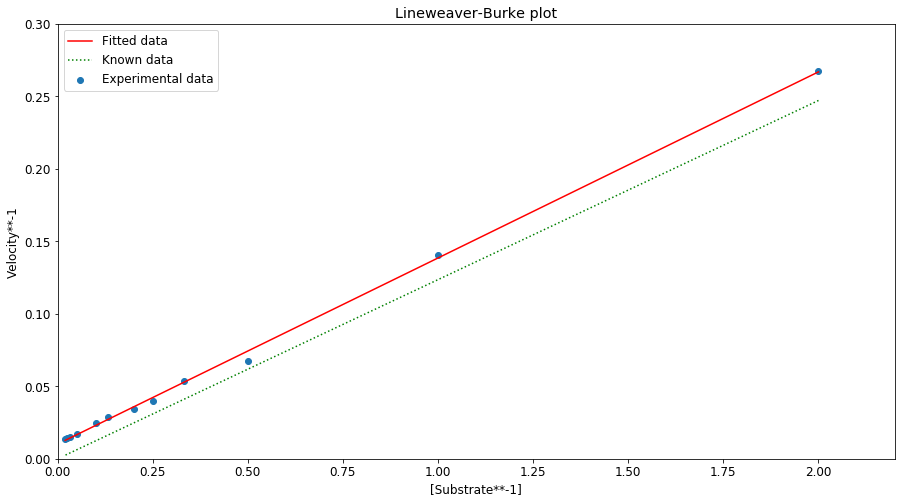

In [19]:
plt.figure(figsize=(15,8))
plt.scatter(reciprocal_concentration, reciprocal_velocity, label='Experimental data')
plt.plot(reciprocal_concentration, ((slope / intercept) /((1 / intercept) * xdata) + 1 / (1 / intercept)), 'r-', label='Fitted data')
plt.plot(reciprocal_concentration, (Km/(Vmax * xdata) + 1 / Vmax), 'g:', label='Known data')

plt.xlim(0.00, 2.20)
plt.ylim(0.00, 0.30)
#plt.grid(True)
plt.legend()
plt.xlabel('[Substrate**-1]')
plt.ylabel('Velocity**-1')
plt.title('Lineweaver-Burke plot')
plt.show()

In [17]:
print(xdata)
print(ydata)

[ 0.500  1.000  2.000  3.000  4.000  5.000  7.500  10.000  20.000  30.000
  40.000  50.000]
[ 3.737  7.112  14.824  18.523  25.037  29.100  34.289  40.562  57.634
  66.846  70.226  72.132]


In [18]:
help (curve_fit)

Help on function curve_fit in module scipy.optimize.minpack:

curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, **kwargs)
    Use non-linear least squares to fit a function, f, to data.
    
    Assumes ``ydata = f(xdata, *params) + eps``
    
    Parameters
    ----------
    f : callable
        The model function, f(x, ...).  It must take the independent
        variable as the first argument and the parameters to fit as
        separate remaining arguments.
    xdata : An M-length sequence or an (k,M)-shaped array for functions with k predictors
        The independent variable where the data is measured.
    ydata : M-length sequence
        The dependent data --- nominally f(xdata, ...)
    p0 : None, scalar, or N-length sequence, optional
        Initial guess for the parameters.  If None, then the initial
        values will all be 1 (if the number of parameters for the function
        can be det